In [1]:
from transformers import AutoTokenizer

In [5]:
model1 = "codellama/CodeLlama-7b-hf"
model2 = "meta-llama/Llama-2-13b-hf"
access_token = "<your huggingface access token>"
tokenizer = AutoTokenizer.from_pretrained(model2, token=access_token)

tokenizer_config.json:   0%|          | 0.00/776 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [7]:
import pandas as pd

combined_discharges_df = pd.read_csv('combined_discharge.csv.gz', compression='gzip')

combined_discharges_df.head()

,hadm_id,text,discharge_instructions,brief_hospital_course,input_original_text,input_hospital_text,input_instructions_text
0,22841357,\nName: ___ Unit No: _...,"Dear ___,\n\n___ was a pleasure to take care o...","___ with HIV on HAART, HCV cirrhosis with asci...",\nName: ___ Unit No: _...,Sex: \nF\n \nAllergies: \nPercocet\n \nChief C...,Summary of Brief House Course \n\nMedications ...
1,22927623,\nName: ___ Unit No: ___\n...,"Dear Ms. ___,\n\nYou were hospitalized at ___....",Ms. ___ is a ___ with history of GERD who pres...,\nName: ___ Unit No: ___\n...,Sex: \nF\n \nAllergies: \nomeprazole\n \nChief...,Summary of Brief House Course \n\nMedications ...
2,21738619,\nName: ___ Unit No: ___...,"Dear ___, \n\n___ were seen in the ED for ongo...",___ Female with PMH significant for depression...,\nName: ___ Unit No: ___...,Sex: \nF\n \nAllergies: \nSulfa (Sulfonamide A...,Summary of Brief House Course \n\nMedications ...
3,25849114,\nName: ___ Unit No: ___...,"Dear Ms. ___,\nIt was a pleasure taking part i...",Ms. ___ is a ___ with metastatic cancer of unk...,\nName: ___ Unit No: ___...,Sex: \nF\n \nAllergies: \nSulfa (Sulfonamide A...,Summary of Brief House Course \n\nMedications ...
4,29654838,\nName: ___ Unit No: ___\n \nAdmi...,"Dear Ms. ___, \n\nYou were admitted for shortn...","___ woman with h/o hypertension, hypelipidemia...",\nName: ___ Unit No: ___\n \nAdmi...,Sex: \nF\n \nAllergies: \nNo Known Allergies /...,Summary of Brief House Course \n\nMedications ...


In [17]:
def tokenize_sentences(text):
    output = tokenizer(text, return_tensors="pt")
    return output['input_ids'].shape[1]+1   #+1 for the EOS token 

In [19]:
combined_discharges_df['discharge_instructions_token_count'] = combined_discharges_df['discharge_instructions'].apply(tokenize_sentences)

In [21]:
combined_discharges_df['brief_hospital_course_token_count'] = combined_discharges_df['brief_hospital_course'].apply(tokenize_sentences)

In [22]:
combined_discharges_df['discharge_instructions_input_token_count'] = combined_discharges_df['input_instructions_text'].apply(tokenize_sentences)

In [23]:
combined_discharges_df['brief_hospital_course_input_token_count'] = combined_discharges_df['input_hospital_text'].apply(tokenize_sentences)

In [29]:
combined_discharges_df.head(10)

,hadm_id,text,discharge_instructions,brief_hospital_course,input_original_text,input_hospital_text,input_instructions_text,discharge_instructions_token_count,brief_hospital_course_token_count,discharge_instructions_input_token_count,brief_hospital_course_input_token_count
0,22841357,\nName: ___ Unit No: _...,"Dear ___,\n\n___ was a pleasure to take care o...","___ with HIV on HAART, HCV cirrhosis with asci...",\nName: ___ Unit No: _...,Sex: \nF\n \nAllergies: \nPercocet\n \nChief C...,Summary of Brief House Course \n\nMedications ...,221,1124,592,1308
1,22927623,\nName: ___ Unit No: ___\n...,"Dear Ms. ___,\n\nYou were hospitalized at ___....",Ms. ___ is a ___ with history of GERD who pres...,\nName: ___ Unit No: ___\n...,Sex: \nF\n \nAllergies: \nomeprazole\n \nChief...,Summary of Brief House Course \n\nMedications ...,113,134,193,969
2,21738619,\nName: ___ Unit No: ___...,"Dear ___, \n\n___ were seen in the ED for ongo...",___ Female with PMH significant for depression...,\nName: ___ Unit No: ___...,Sex: \nF\n \nAllergies: \nSulfa (Sulfonamide A...,Summary of Brief House Course \n\nMedications ...,178,551,662,1882
3,25849114,\nName: ___ Unit No: ___...,"Dear Ms. ___,\nIt was a pleasure taking part i...",Ms. ___ is a ___ with metastatic cancer of unk...,\nName: ___ Unit No: ___...,Sex: \nF\n \nAllergies: \nSulfa (Sulfonamide A...,Summary of Brief House Course \n\nMedications ...,261,113,747,1782
4,29654838,\nName: ___ Unit No: ___\n \nAdmi...,"Dear Ms. ___, \n\nYou were admitted for shortn...","___ woman with h/o hypertension, hypelipidemia...",\nName: ___ Unit No: ___\n \nAdmi...,Sex: \nF\n \nAllergies: \nNo Known Allergies /...,Summary of Brief House Course \n\nMedications ...,334,935,1387,1606
5,26913865,\nName: ___ Unit No: ___\n \nAdmi...,"Dear Ms. ___,\n\nIt was a pleasure caring for ...","___ female with ___, HTN, diabetes, CKD presen...",\nName: ___ Unit No: ___\n \nAdmi...,Sex: \nF\n \nAllergies: \nNo Known Allergies /...,Summary of Brief House Course \n\nMedications ...,177,894,840,1204
6,25242409,\nName: ___ Unit No: ___\n \nAdmi...,"Dear ___,\n\nIt was a pleasure caring for you ...",Outpatient Providers: ___ with PMHx significan...,\nName: ___ Unit No: ___\n \nAdmi...,Sex: \nF\n \nAllergies: \nNo Known Allergies /...,Summary of Brief House Course \n\nMedications ...,285,1459,812,1652
7,25911675,\nName: ___ Unit No: ___\n \nAdmi...,"Dear ___,\n\nIt was a pleasure caring for you....",Ms. ___ is a ___ year old woman with a past me...,\nName: ___ Unit No: ___\n \nAdmi...,Sex: \nF\n \nAllergies: \nNo Known Allergies /...,Summary of Brief House Course \n\nMedications ...,145,401,1824,1587
8,29659838,\nName: ___ Unit No: ___\n \nAdmi...,"Mrs. ___, \n\n___ were admitted to ___ for tre...",___ year-old female with history of hypertensi...,\nName: ___ Unit No: ___\n \nAdmi...,Sex: \nF\n \nAllergies: \nNo Known Allergies /...,Summary of Brief House Course \n\nMedications ...,111,1180,1045,2280
9,24597018,\nName: ___ Unit No: ___\n \n...,Have a friend/family member check your incisi...,Mrs. ___ presented to the ___ Emergency Depart...,\nName: ___ Unit No: ___\n \n...,Sex: \nF\n \nAllergies: \nPenicillins\n \nChie...,Summary of Brief House Course \n\nMedications ...,322,735,752,1102


In [24]:
import matplotlib.pyplot as plt

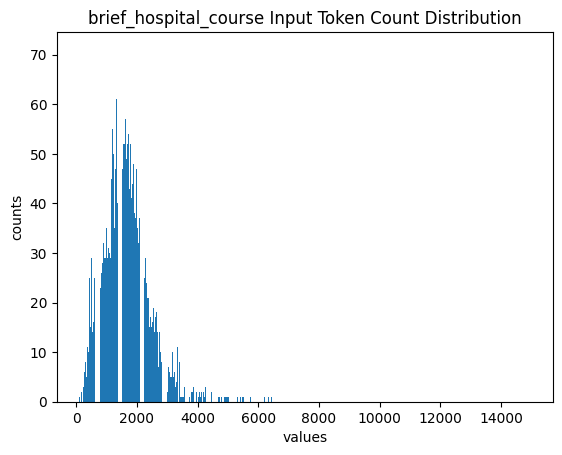

In [28]:
value_counts = combined_discharges_df['brief_hospital_course_input_token_count'].value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('values')
plt.ylabel('counts')
plt.title('brief_hospital_course Input Token Count Distribution')
plt.show()

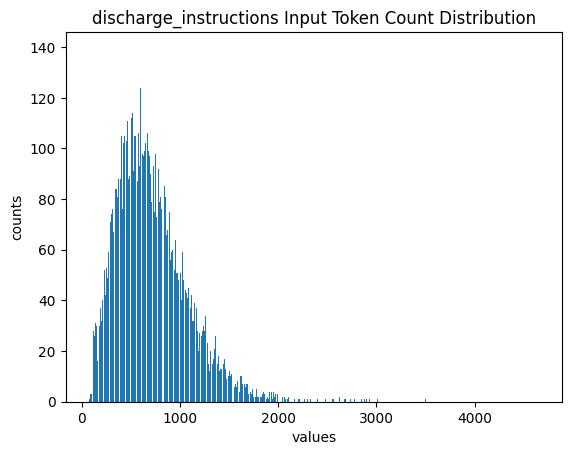

In [26]:
value_counts = combined_discharges_df['discharge_instructions_input_token_count'].value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('values')
plt.ylabel('counts')
plt.title('discharge_instructions Input Token Count Distribution')
plt.show()

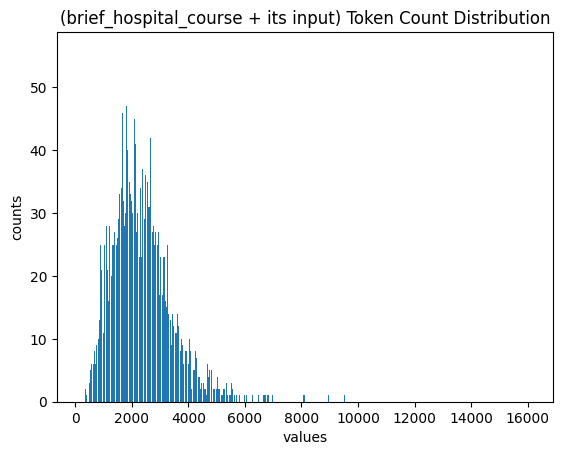

In [30]:
value_counts = (combined_discharges_df['brief_hospital_course_input_token_count'] + combined_discharges_df['brief_hospital_course_token_count']).value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('values')
plt.ylabel('counts')
plt.title('(brief_hospital_course + its input) Token Count Distribution')
plt.show()

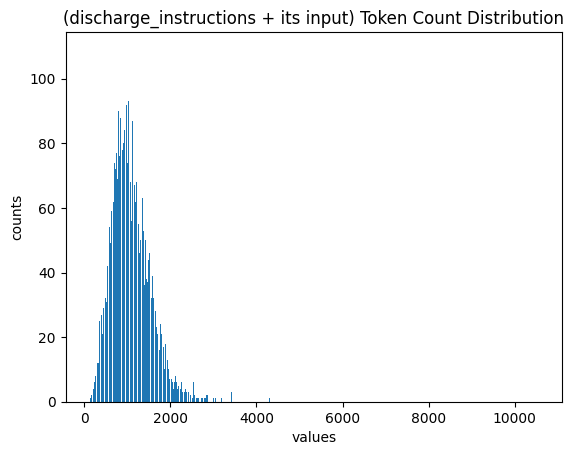

In [31]:
value_counts = (combined_discharges_df['discharge_instructions_input_token_count'] + combined_discharges_df['discharge_instructions_token_count']).value_counts()

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('values')
plt.ylabel('counts')
plt.title('(discharge_instructions + its input) Token Count Distribution')
plt.show()

In [33]:
# save the combined discharge dataframe
combined_discharges_df.to_csv('combined_discharge_with_token_count.csv.gz', index=False, compression='gzip')